# MACHINE LEARNING PROJECT

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math as m
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [2]:
def read_data():
    data = pd.read_csv("D:\Study\Assingment\seaborn-data-master\seaborn-data-master\mpg.csv")
    return data
data = read_data()

In [3]:
print(data.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
print(data.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


In [6]:
data.drop(columns={'name','origin','model_year'},inplace=True)

In [7]:
print(data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
dtype: int64


In [8]:
print(data.fillna(104.469388,inplace=True))

None


In [9]:
print(data.duplicated().sum())

1


In [10]:
data.drop_duplicates(inplace=True)

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>],
       [<Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>]], dtype=object)

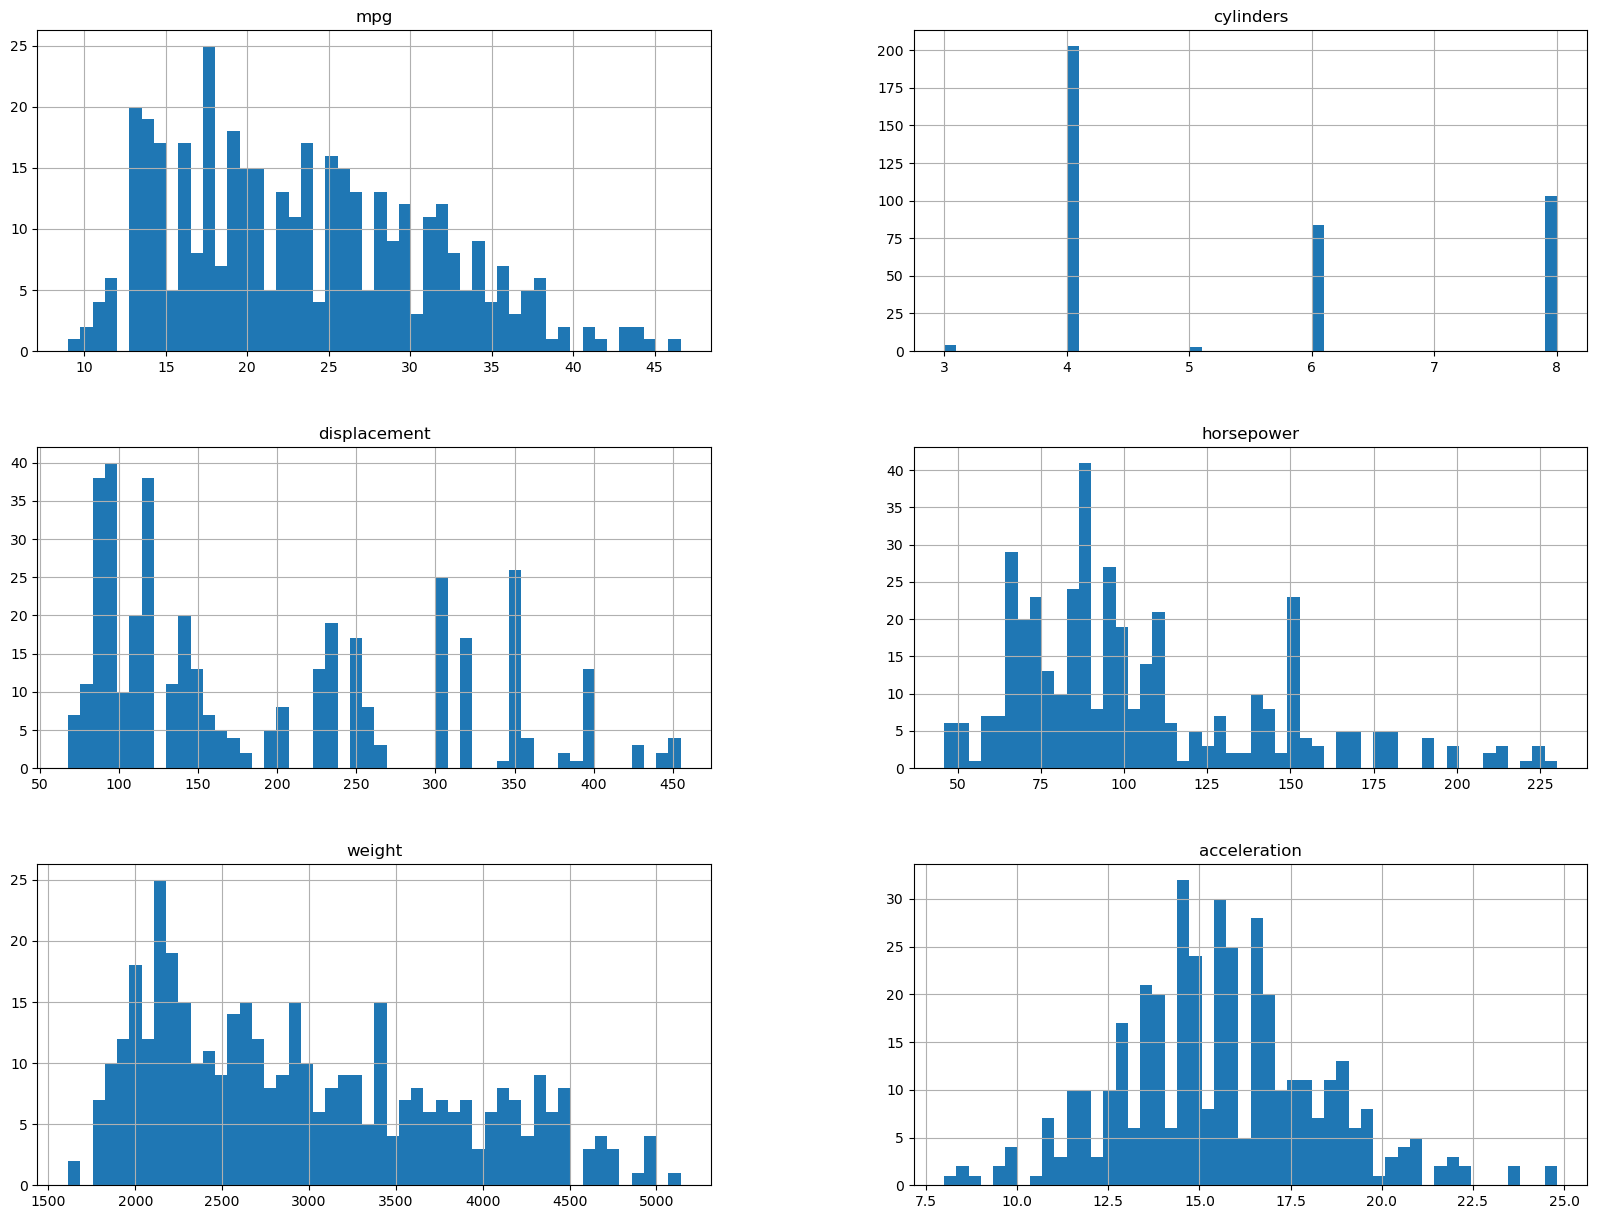

In [11]:
data.hist(bins=50,figsize=(20,15))

<Axes: xlabel='mpg', ylabel='horsepower'>

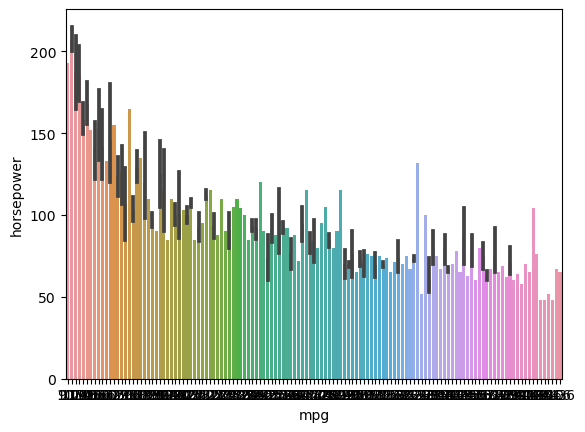

In [12]:
sns.barplot(x='mpg',y='horsepower',data=data)

In [13]:
data.corr()['mpg']>0.4

mpg              True
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration     True
Name: mpg, dtype: bool

In [14]:
##  Creating a model that will be predict mpg based on the other value

In [15]:
x = data[['cylinders','displacement','horsepower','weight','acceleration']]
y = data['mpg']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=1234)

In [17]:
model=LinearRegression()
model_train = model.fit(x_train,y_train)
#print(model.coef_)
#print(model.intercept_)
pred = model_train.predict(x)
pred
data['pred_mpg'] = pred

print("Accuracy of the this model is")

round(r2_score(data['mpg'],data['pred_mpg'])*100,2)

Accuracy of the this model is


70.44

In [18]:
# We are taking another regression to understing to how much accuracy its giving

In [19]:
model2 = Lasso()

In [20]:
model2_train = model2.fit(x_train,y_train)

In [21]:
pred2 = model2.predict(x_test)

In [22]:
rmse = m.rmse=mean_squared_error(y_test,pred2)

In [23]:
r2_score(y_test,pred2)*100

70.1503324461457

In [24]:
# We are taking another regression to understing to how much accuracy its giving

In [25]:
model3 = Ridge()

In [26]:
model3_train = model3.fit(x_train,y_train)

In [27]:
pred3 = model3.predict(x_test)

In [28]:
r2_score(y_test,pred3)*100

70.20356119730795